In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd

In [3]:
# read in csv to be used for model
data = pd.read_csv('data/new_country_data.csv')
data = data.dropna()

In [4]:
# Assign the data to x and y 
X = data[['happiness_score_2015','human_development_index','gdp_percapita_2015','alcohol_consumption_percapita',\
         'health_spending_percapita_2015','private_debt_2015']]
y = data['sui_per_100k_2015'].values.reshape(-1,1)
print(X.shape,y.shape)

(111, 6) (111, 1)


In [5]:
# create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.columns

Index(['happiness_score_2015', 'human_development_index', 'gdp_percapita_2015',
       'alcohol_consumption_percapita', 'health_spending_percapita_2015',
       'private_debt_2015'],
      dtype='object')

In [7]:
# scale the data for better processing with standardscaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
y_test_scaled

array([[-1.37320289],
       [ 1.08208106],
       [ 0.40005774],
       [-0.86655699],
       [-0.24299282],
       [-0.88604337],
       [ 0.73132621],
       [-1.2562846 ],
       [-0.12607453],
       [ 0.3415986 ],
       [-0.10658815],
       [-0.98347528],
       [-0.69117957],
       [-1.23679822],
       [ 1.8420499 ],
       [-1.37320289],
       [ 1.39386314],
       [-0.08710177],
       [ 0.20519393],
       [ 0.88721725],
       [ 0.36108498],
       [-0.30145196],
       [-0.61323405],
       [-1.13936632],
       [-0.39888386],
       [ 0.61440792],
       [ 0.12724841],
       [ 1.4328359 ]])

In [10]:
# quantify the model using the scaled data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

history = model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

coef = model.coef_
coef_df = pd.DataFrame(coef, columns=[['happiness_score_2015',\
    'human_development_index', 'gdp_percapita_2015','alcohol_consumption_percapita', 'health_spending_percapita_2015',\
                                       'private_debt_2015']])
intercept = model.intercept_
intercept = pd.DataFrame(intercept, columns=['int'])


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


print(f"MSE: {MSE}, R2: {r2}")

predictions_df = pd.DataFrame(predictions, columns=['predictions'])
actual_df = pd.DataFrame(y_test_scaled, columns=['actual'])
test_df = pd.concat([predictions_df,actual_df],axis=1)


Training Score: 0.3641380678685078
Testing Score: 0.49326504134159643
MSE: 0.4057530109051795, R2: 0.49326504134159643


,predictions,actual
0,-0.458746,-1.373203
1,0.045596,1.082081
2,0.197454,0.400058
3,-0.740923,-0.866557
4,-0.026911,-0.242993
5,0.040182,-0.886043
6,-0.287042,0.731326
7,-0.831484,-1.256285
8,-0.254947,-0.126075
9,-0.648448,0.341599


Text(0.5, 1.0, 'Residual Plot')

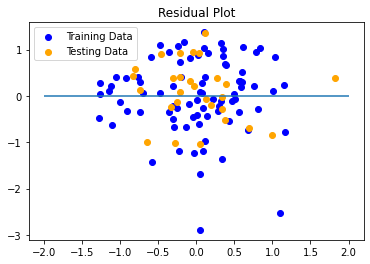

In [11]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-2, xmax=2)
plt.title("Residual Plot")

In [20]:
model.predict(X_test[:10])

array([[ 198.9506794 ],
       [ 115.93400949],
       [8481.27023948],
       [9356.13177707],
       [ 108.5938577 ],
       [1431.71562282],
       [ 548.82160014],
       [ 488.60712404],
       [ 370.64911147],
       [ 413.10281024]])

In [15]:
y_test[:10]

array([[ 3.1],
       [15.7],
       [12.2],
       [ 5.7],
       [ 8.9],
       [ 5.6],
       [13.9],
       [ 3.7],
       [ 9.5],
       [11.9]])